In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [2]:
df = pd.read_csv("C:\\Users\\jstyl\\Downloads\\Soil.csv", parse_dates=['date'], index_col='date')
df.head()

N     P     K  temperature   humidity        ph  \
date                                                                       
2009-01-01 00:10:00  133.0  47.0  24.0    24.402289  79.197320  7.231325   
2009-01-01 00:20:00  136.0  36.0  20.0    23.095956  84.862757  6.925412   
2009-01-01 00:30:00  104.0  47.0  18.0    23.965635  76.976967  7.633437   
2009-01-01 00:40:00  133.0  47.0  23.0    24.887381  75.621372  6.827355   
2009-01-01 00:50:00  126.0  38.0  23.0    25.362438  83.632761  6.176716   

                     Unnamed: 7  Unnamed: 8  Mean N  Mean P  Mean K  \
date                                                                  
2009-01-01 00:10:00         NaN         NaN  117.77   46.24   19.56   
2009-01-01 00:20:00         NaN         NaN     NaN     NaN     NaN   
2009-01-01 00:30:00         NaN         NaN     NaN     NaN     NaN   
2009-01-01 00:40:00         NaN         NaN     NaN     NaN     NaN   
2009-01-01 00:50:00         NaN         NaN     NaN     NaN     NaN   

                     Mean Temperature  Mean Humidity    MeanPH  
date                                                            
2009-01-01 00:10:00         23.988958      79.843474  6.912675  
2009-01-01 00:20:00               NaN            NaN       NaN  
2009-01-01 00:30:00               NaN            NaN       NaN  
2009-01-01 00:40:00               NaN            NaN       NaN  
2009-01-01 00:50:00               NaN            NaN       NaN

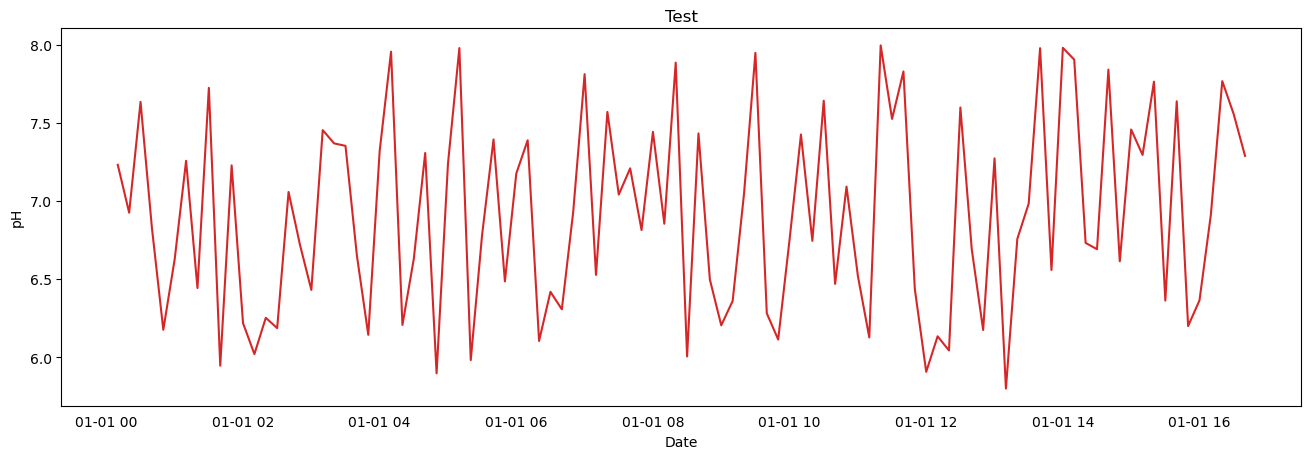

In [13]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='pH', dpi=100):
    
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.ph, title='Test') 

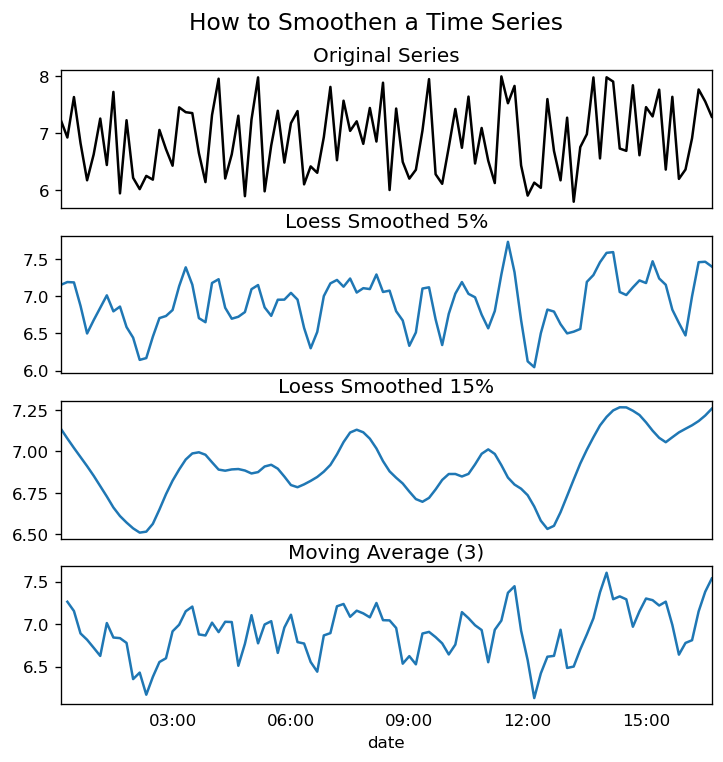

In [32]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# Import
df_orig = pd.read_csv('C:\\Users\\jstyl\\Downloads\\Soil.csv', parse_dates=['date'], index_col='date')

# 1. Moving Average
df_ma = df_orig.ph.rolling(3, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df_orig.ph, np.arange(len(df_orig.ph)), frac=0.05)[:, 1], index=df_orig.index, columns=['ph'])
df_loess_15 = pd.DataFrame(lowess(df_orig.ph, np.arange(len(df_orig.ph)), frac=0.15)[:, 1], index=df_orig.index, columns=['ph'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
df_orig['ph'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['ph'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['ph'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()

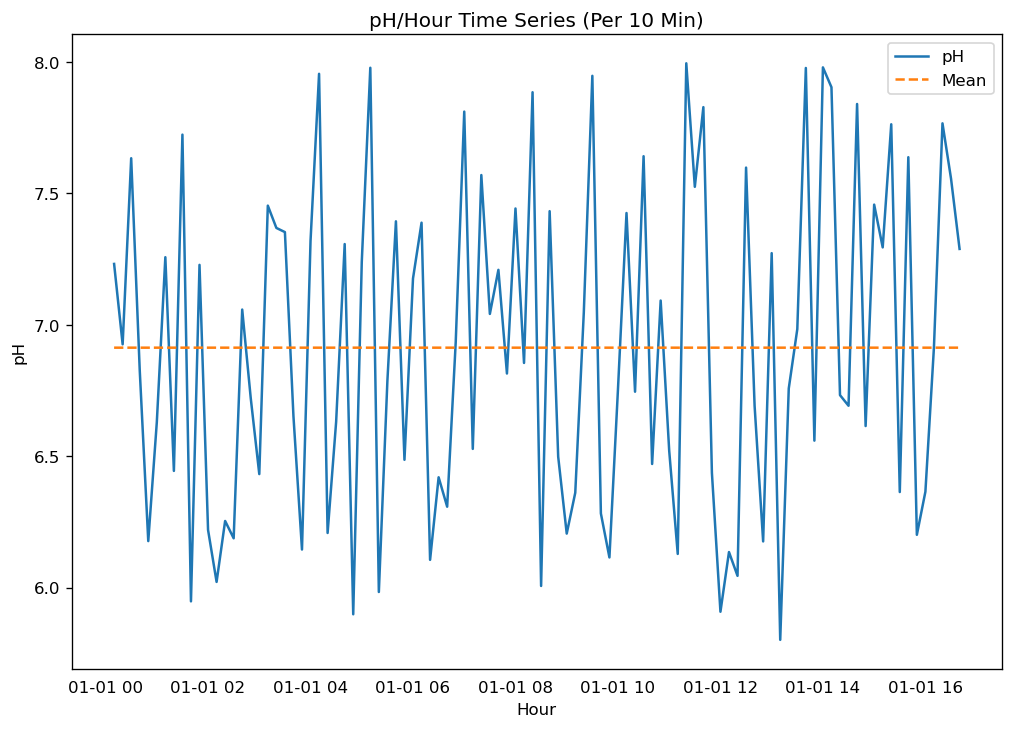

In [33]:
def plot_df(df, x, y, title="", xlabel='Hour', ylabel='pH', dpi=100):
    
    #Calculate mean of pH
    y_mean = [np.mean(y)]*len(x)
    fig,ax = plt.subplots()
    
    #Plot pH line
    data_line = ax.plot(x,y, label='pH')
    
    #Plot mean line
    mean_line = ax.plot(x,y_mean, label='Mean', linestyle='--')
    
    #Set title & label
    legend = ax.legend(loc='upper right')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)

plot_df(df, x=df.index, y=df.ph, title='pH/Hour Time Series (Per 10 Min)') 

In [17]:
df2 = pd.read_csv("C:\\Users\\jstyl\\Downloads\\Soil2.csv", parse_dates=['date'], index_col='date')
df2.head()

N     P     K  temperature   humidity        ph
date                                                                    
2009-01-01 00:00:00  133.0  47.0  24.0    24.402289  79.197320  7.231325
2009-01-01 01:00:00  126.0  50.0  19.0    24.694571  81.735888  6.628723
2009-01-01 02:00:00  122.0  59.0  18.0    23.500099  83.634890  6.219469
2009-01-01 03:00:00  100.0  46.0  18.0    24.185862  76.042040  6.431690
2009-01-01 04:00:00  100.0  41.0  22.0    22.420475  84.557947  7.318802

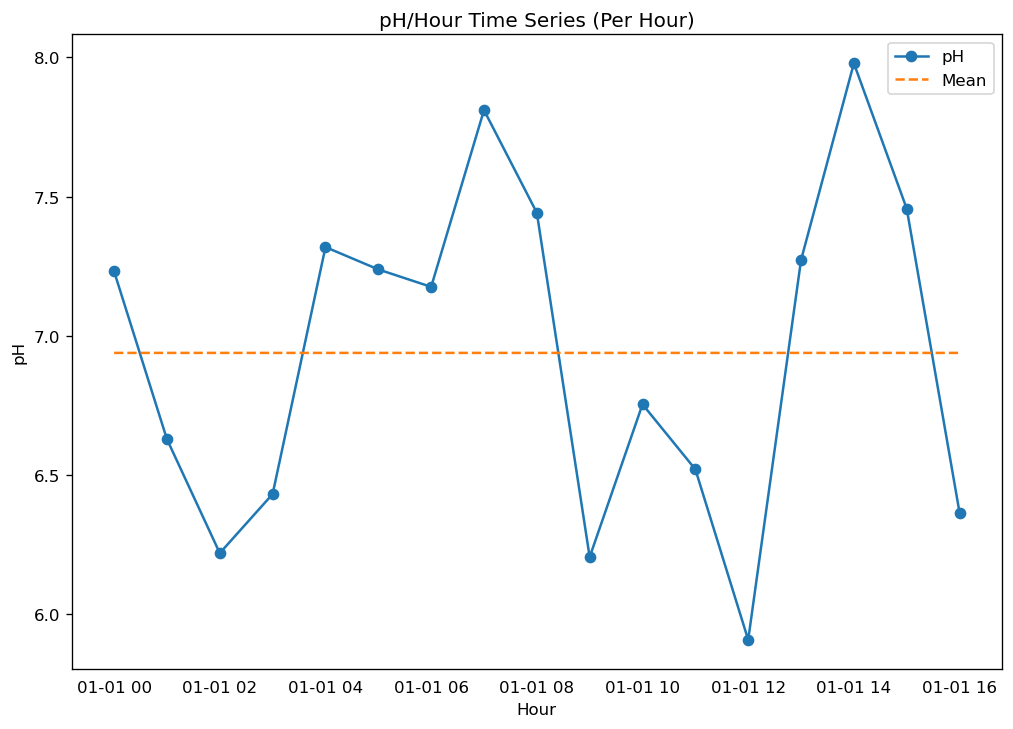

In [26]:
def plot_df2(df2, x, y, title="", xlabel='Hour', ylabel='pH', dpi=100):
    
    #Calculate mean of pH
    y_mean = [np.mean(y)]*len(x)
    fig,ax = plt.subplots()
    
    #Plot pH line
    data_line = ax.plot(x,y, label='pH', marker='o')
    
    #Plot mean line
    mean_line = ax.plot(x,y_mean, label='Mean', linestyle='--')
    
    #Set title & label
    legend = ax.legend(loc='upper right')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)

plot_df2(df, x=df2.index, y=df2.ph, title='pH/Hour Time Series (Per Hour)') 